# Aula 1 - Introdução e Preparação
# Modelos pre treinados
- Pequeno: 21 MB
- Medio: 48 MB
- Grande: 550 MB

## Etapas Iniciais
- Instalar o modulo spaCy
- Download do modelo pre treinado (em pt)
- Carregar modulo spacy
- Carregar modelo: cria objeto NLP

Metodo NLP produz um objeto Doc, que é processado de acordo com um pipeline.

Voce pode nao executar etapas, ou ainda criar etapas personalizadas

Text --> [ tokenizar, tagger, parser, ner, .... ] --> Doc

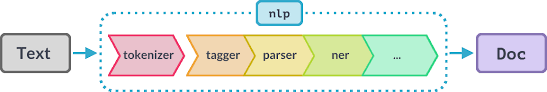

In [1]:
# !pip install -U spacy==3.2.0
# A versão mais recente do spaCy é a 3.7.4

#!pip install -U spacy
!pip install -U spacy==3.7.4

In [2]:
# modelo grande
!python -m spacy download 'pt_core_news_lg'

# modelo medio
# !python -m spacy download 'pt_core_news_md'

# modelo pequeno
# !python -m spacy download 'pt_core_news_sm'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy

In [4]:
# baixamos: !python -m spacy download 'pt_core_news_lg'
#criando o obj com o modelo grande

nlp = spacy.load('pt_core_news_lg')

In [5]:
print(type(nlp))

print(f'\nPipeline padrao que esta executando:', nlp.pipe_names)

<class 'spacy.lang.pt.Portuguese'>

Pipeline padrao que esta executando: ['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [6]:
documento = nlp("A Universidade Federal de Viçosa (U.F.V) é uma das mais antigas instituições de ensino superior do Brasil (1926). Ela foi inaugurada como Escola Superior de Agricultura e Veterinária (Esav)")

print(f'Quantas palavras tem: ', len(documento.vocab))
print(f'\nTipo do documento: ', type(documento))

Quantas palavras tem:  375

Tipo do documento:  <class 'spacy.tokens.doc.Doc'>


# Aula 2: Produçao de Tokens

Quando chama o metodo nlp, cria um objeto do tipo Doc. Esses objetos sao compostos por **Tokens**.

A tokenizaçao é a unica parte do pipeline que nao é opcional, sempre sera executada

E tambem, pode tratar esse objeto como **Span**. Que sao parte do texto, mas nao necessariamente, é a sentença completa.

### Texto sao codificados em hashes unicos
- Ficam armazenados no "Vocabulario"
- Que vai ter sua representaçao em texto "String Store" armazenado uma unica vez


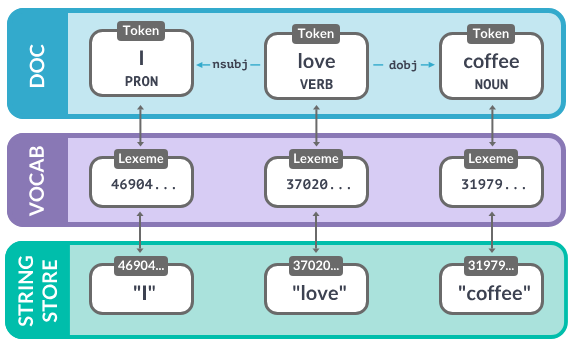


### Propriedades de um Token

Podemos chegar a diversos atributos de um token
- Se ele é stop word  (palavra sem valor semantico: ta, pra, etc)
- Se é alfa numerico
- Se é pontuaçao
- Se é inicial na sentença
- Etc

In [7]:
for token in documento:
  print(token.text)

#note que:
# U.F.V nao foi separada em pontuaçao e letra, ele entendeu que é a mesma palavra

A
Universidade
Federal
de
Viçosa
(
U.F.V
)
é
uma
das
mais
antigas
instituições
de
ensino
superior
do
Brasil
(
1926
)
.
Ela
foi
inaugurada
como
Escola
Superior
de
Agricultura
e
Veterinária
(
Esav
)


In [8]:
print(f'A quinta letra do documento é:', documento[4])

# spam, intervalo do texto
print(f'\nUm spam do texto é: ', documento[0:8])

A quinta letra do documento é: Viçosa

Um spam do texto é:  A Universidade Federal de Viçosa (U.F.V)


In [9]:
print("Tokens: ", [token.text for token in documento])
print("\nStop Word: ", [token.is_stop for token in documento])
print("\nAlfanum: ", [token.is_alpha for token in documento])
print("\nMaiusculo: ", [token.is_upper for token in documento])
print("\nPontuaçao: ", [token.is_punct for token in documento])
print("\nNumero: ", [token.like_num for token in documento])
print("\nSentença Inicial: ", [token.is_sent_start for token in documento])

Tokens:  ['A', 'Universidade', 'Federal', 'de', 'Viçosa', '(', 'U.F.V', ')', 'é', 'uma', 'das', 'mais', 'antigas', 'instituições', 'de', 'ensino', 'superior', 'do', 'Brasil', '(', '1926', ')', '.', 'Ela', 'foi', 'inaugurada', 'como', 'Escola', 'Superior', 'de', 'Agricultura', 'e', 'Veterinária', '(', 'Esav', ')']

Stop Word:  [True, False, False, True, False, False, False, False, True, True, True, True, False, False, True, False, False, True, False, False, False, False, False, True, True, False, True, False, False, True, False, True, False, False, False, False]

Alfanum:  [True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, True, False]

Maiusculo:  [True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [ ]:
# mostrar o formato (quantdiade de letras, pontos etc)

print("Tokens: ", [token.text for token in documento])
print("\nFormato: ", [token.shape_ for token in documento])

In [10]:
for token in documento:
  if token.like_num:
    print("\nNumero encontrado: ", token.text)

  if token.is_punct:
    print("\nPontuaçao encontrada: ", token.text)


Pontuaçao encontrada:  (

Pontuaçao encontrada:  )

Pontuaçao encontrada:  (

Numero encontrado:  1926

Pontuaçao encontrada:  )

Pontuaçao encontrada:  .

Pontuaçao encontrada:  (

Pontuaçao encontrada:  )


# Aula 3: Pos-Taggin e Dependencias

Part of speech

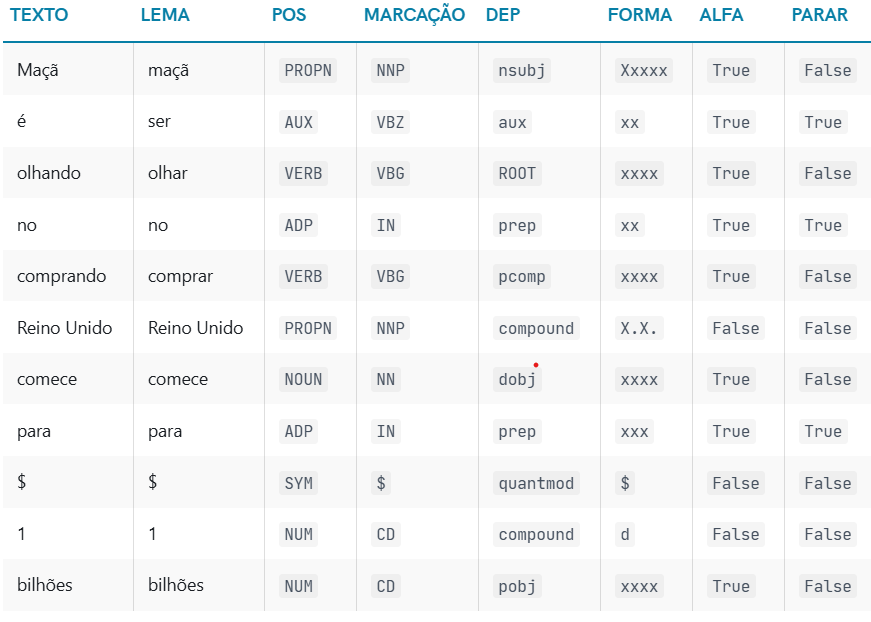

In [11]:
for token in documento:
  print(token.text, " - ", token.pos_, " - ", token.dep_, " - ", token.lemma_, " - ", token.shape_)

# lemma: como se fosse uma representaçao unica
# ex: antigas ---> antigo
#     de ---> de o

# pos != pos_
# pos: traz o numero de referencia (nome proprio: tem um numero, sujeito tem outro numero etc etc)
# pos_: tras o nome

A  -  DET  -  det  -  o  -  X
Universidade  -  PROPN  -  nsubj  -  Universidade  -  Xxxxx
Federal  -  PROPN  -  flat:name  -  Federal  -  Xxxxx
de  -  ADP  -  case  -  de  -  xx
Viçosa  -  PROPN  -  nmod  -  Viçosa  -  Xxxxx
(  -  PUNCT  -  punct  -  (  -  (
U.F.V  -  PROPN  -  appos  -  U.F.V  -  X.X.X
)  -  PUNCT  -  punct  -  )  -  )
é  -  AUX  -  cop  -  ser  -  x
uma  -  NUM  -  ROOT  -  um  -  xxx
das  -  ADP  -  case  -  de o  -  xxx
mais  -  ADV  -  advmod  -  mais  -  xxxx
antigas  -  ADJ  -  amod  -  antigo  -  xxxx
instituições  -  NOUN  -  nmod  -  instituição  -  xxxx
de  -  ADP  -  case  -  de  -  xx
ensino  -  NOUN  -  nmod  -  ensino  -  xxxx
superior  -  ADJ  -  amod  -  superior  -  xxxx
do  -  ADP  -  case  -  de o  -  xx
Brasil  -  PROPN  -  nmod  -  Brasil  -  Xxxxx
(  -  PUNCT  -  punct  -  (  -  (
1926  -  NUM  -  parataxis  -  1926  -  dddd
)  -  PUNCT  -  punct  -  )  -  )
.  -  PUNCT  -  punct  -  .  -  .
Ela  -  PRON  -  nsubj:pass  -  ela  -  Xxx
foi  -  AUX

In [12]:
for token in documento:
  print(token.text, " - ", token.morph)

# morfologia, tras o genero (fem, masc) e a quantidade (singular, plural), se é numeral, pontuaçao nao tras nada

A  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
Universidade  -  Gender=Fem|Number=Sing
Federal  -  Number=Sing
de  -  
Viçosa  -  Number=Sing
(  -  
U.F.V  -  Gender=Fem|Number=Sing
)  -  
é  -  Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
uma  -  NumType=Card
das  -  Definite=Def|Gender=Fem|Number=Plur|PronType=Art
mais  -  
antigas  -  Gender=Fem|Number=Plur
instituições  -  Gender=Fem|Number=Plur
de  -  
ensino  -  Gender=Masc|Number=Sing
superior  -  Gender=Masc|Number=Sing
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Brasil  -  Gender=Masc|Number=Sing
(  -  
1926  -  NumType=Card
)  -  
.  -  
Ela  -  Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs
foi  -  Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
inaugurada  -  Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass
como  -  
Escola  -  Gender=Fem|Number=Sing
Superior  -  Number=Sing
de  -  
Agricultura  -  Number=Sing
e  -  
Veterinária  -  Number=Sing
(  -  
Esav  -  Number=Sing
)  -  


In [13]:
for token in documento:
  print(token.text, " - ", token.tag_)

A  -  DET
Universidade  -  PROPN
Federal  -  PROPN
de  -  ADP
Viçosa  -  PROPN
(  -  PUNCT
U.F.V  -  PROPN
)  -  PUNCT
é  -  AUX
uma  -  NUM
das  -  ADP
mais  -  ADV
antigas  -  ADJ
instituições  -  NOUN
de  -  ADP
ensino  -  NOUN
superior  -  ADJ
do  -  ADP
Brasil  -  PROPN
(  -  PUNCT
1926  -  NUM
)  -  PUNCT
.  -  PUNCT
Ela  -  PRON
foi  -  AUX
inaugurada  -  VERB
como  -  ADP
Escola  -  PROPN
Superior  -  PROPN
de  -  ADP
Agricultura  -  PROPN
e  -  CCONJ
Veterinária  -  PROPN
(  -  PUNCT
Esav  -  PROPN
)  -  PUNCT


# Aula 4: Listando entidades nomeadas

Tipo  | Descriçao

- PERSON    |     Pessoas
- NORP      |     Nacionalidades ou grupos religiosos ou politicos
- FAC       |     Edificos, aeroportos, rodovias, pontes etc
- ORG       |     Empresas, agencias, etc
- GPE       |     Paises, cidades, estados
- LOC       |     Locais nao geopolitcos, cadeias de montanhas, rios etc
- PRODUCT   |     Objetos, veiculos, alimentos etc
- EVENT     |     Furacoes, batalhas, guerras, eventos esportivos etc
- WORKOFART |     Titulos de livros, musicas, etc
- LAW       |     Documentos de leis
- LANGUAGE  |     Idiomas
- DATE      |     Datas
- TIME      |     Tempos menos que 1 dia
- PERCENT   |     Porcentagem, incluido %
- MONEY     |     Valores monetarios
- QUANTITY  |     Medidas como peso, distancia
- ORDINAL   |     Primeiro, segundo, etc
- CARDINAL  |     Numeros que nao sao ordinais

In [14]:
for ent in documento.ents:
  print(ent.text, " - ", ent.label_)


# ELE ERRA, 'Universidade Federal de Viçosa' é ORG

Universidade Federal de Viçosa  -  LOC
U.F.V  -  LOC
Brasil  -  LOC
Escola Superior de Agricultura e Veterinária  -  LOC
Esav  -  LOC


# Aula 5: Gerenciando Stop Words

- Consultar
- Adicionar
- Checar se um token é uma Stop Word

In [15]:
for token in documento:
  if token.is_stop:
    print("Stop Word: ", token.text)

Stop Word:  A
Stop Word:  de
Stop Word:  é
Stop Word:  uma
Stop Word:  das
Stop Word:  mais
Stop Word:  de
Stop Word:  do
Stop Word:  Ela
Stop Word:  foi
Stop Word:  como
Stop Word:  de
Stop Word:  e


In [16]:
# consultar quais sao considerados sw pelo modelo que baixei

for words in nlp.Defaults.stop_words:
  print(words)

dizem
fim
nossos
estiveram
todas
sexta
tive
usa
puderam
vos
é
alguns
dar
sexto
foram
da
parte
sabe
sei
algo
ademais
vem
certeza
têm
estão
cá
adeus
conhecida
menos
vêm
vindo
tanto
tenho
corrente
deverá
tuas
iniciar
máximo
são
das
o
muitos
eu
quarto
sua
bastante
menor
vossos
debaixo
vossas
dezanove
estivestes
nós
ambas
fazes
tão
essas
possível
favor
com
nuns
teus
portanto
ser
deste
fostes
seria
inclusive
cujo
meus
já
nosso
meses
mesmo
primeira
podia
esses
pegar
está
todos
pontos
vão
fazem
nunca
tivemos
fazer
assim
fazia
isto
obrigada
numa
ele
querem
catorze
doze
fará
podem
mais
dezasseis
põem
estivemos
seis
num
tente
algumas
dezoito
mas
foste
que
grande
daquela
nove
faz
novas
tudo
nesse
direita
perto
terceiro
atrás
maior
comprida
estava
qualquer
agora
pois
ainda
elas
uns
des
por
teu
tentar
quê
vocês
possivelmente
após
próximo
quem
zero
exemplo
oitavo
pouco
contudo
lado
tentei
coisa
sob
no
apontar
diante
quinze
cinco
contra
quer
aí
as
quinta
pela
ir
nos
às
quando
não
final
porém
aquela
co

In [17]:
# adicionar uma palavra para ser considerada como sw

nlp.Defaults.stop_words.add("porém")

nlp.vocab['porém'].is_stop = True

In [18]:
nlp.vocab['porém'].is_stop

True

In [19]:
# remover algumas stop words

nlp.Defaults.stop_words.remove("porém")
nlp.vocab['porém'].is_stop = False

In [20]:
# remover algumas stop words

token_list = []

for token in documento:
  token_list.append(token.text)


stop_list = []

for words in nlp.Defaults.stop_words:
  stop_list.append(words)


semstop = [word for word in token_list if not word in stop_list]

print(documento.text)
print(semstop)

A Universidade Federal de Viçosa (U.F.V) é uma das mais antigas instituições de ensino superior do Brasil (1926). Ela foi inaugurada como Escola Superior de Agricultura e Veterinária (Esav)
['A', 'Universidade', 'Federal', 'Viçosa', '(', 'U.F.V', ')', 'antigas', 'instituições', 'ensino', 'superior', 'Brasil', '(', '1926', ')', '.', 'Ela', 'inaugurada', 'Escola', 'Superior', 'Agricultura', 'Veterinária', '(', 'Esav', ')']


# Aula 6: Vocabulario

Cada palavra é representada por um hash
- O vocabulario armazena o Lexema e o hash

Lexema é a palavavra que nao depende do contexto (inimigas --> viram inimigo)

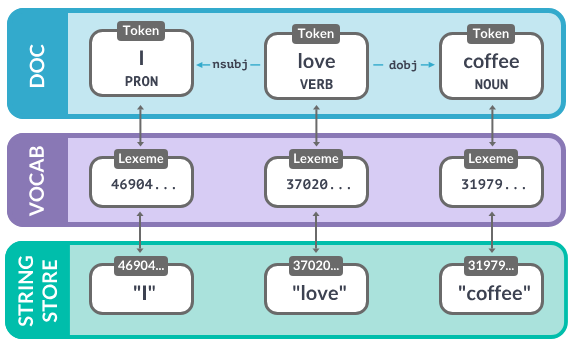

In [21]:
print("Hash: ", nlp.vocab.strings["dados"])
print("\nHash: ", documento.vocab.strings["dados"])

Hash:  6013848609874238634

Hash:  6013848609874238634


In [22]:
print("String: ", nlp.vocab.strings[6013848609874238634])

String:  dados


In [23]:
# ver o lexema

lex = nlp.vocab["dados"]
print(lex.text, " - ", lex.orth, " - ", lex.is_alpha, " - ", lex.is_lower)

dados  -  6013848609874238634  -  True  -  True


In [24]:
# vetor onde cada posiçao tem um peso da palavra com as outras (a relaçao dela)

print(nlp("dados").vector.shape)

print(nlp("dados").vector)

(300,)
[-1.8078e+00 -2.8421e+00 -5.5345e-01 -4.0565e+00 -2.3565e+00  4.7295e+00
 -3.3508e+00 -1.2036e+00 -5.3749e+00 -7.5768e-01 -2.0015e+00  5.3618e+00
  2.2789e-01  1.2136e+00 -1.4418e+00 -3.0621e+00  2.2060e+00  1.1943e+00
 -1.8689e+00 -5.9128e+00 -5.1929e-01  2.1897e+00 -2.4651e+00  1.7600e+00
 -5.6308e+00  1.0053e+00  7.3080e-01  2.0417e-01 -6.0370e+00  1.7474e+00
  2.0375e+00  2.7541e+00 -1.0423e+00  1.7632e+00 -1.4484e+00 -2.4344e+00
 -8.6094e-01  1.7867e+00 -4.9920e+00 -3.1162e+00 -5.3973e-01  2.4241e+00
  4.4410e-01 -4.7503e+00  2.1383e+00  3.8537e-01 -2.2418e+00  5.8104e+00
 -1.1731e+00  2.4686e-02 -1.8413e+00 -5.9321e+00 -7.0872e-03 -2.3093e+00
  5.5101e+00 -4.1795e-01  2.9754e+00  3.6709e-01 -8.0867e-01 -1.3751e+00
  4.8132e+00 -2.2835e+00 -2.0920e-01  1.2578e+00  4.3466e+00  1.3846e+00
 -1.5847e+00  3.3322e+00 -4.3669e+00  1.8883e+00 -1.2312e+00  3.7902e-01
  8.6331e-01 -4.0607e+00 -1.3444e+00  4.5210e+00  2.2995e-01 -5.9245e+00
 -2.0598e-01 -3.1810e+00 -3.8640e+00  7.2114

In [25]:
print(nlp("dados são uma nova forma").vector)

[-8.4332597e-01 -1.1540320e+00 -4.2729980e-01 -1.8128799e+00
 -2.5974798e+00  9.4433796e-01 -2.3143241e+00 -1.3510940e+00
 -2.9273198e+00 -1.9745820e+00  1.9930201e+00  5.2291405e-01
 -6.6332805e-01 -1.4313240e+00 -1.6124800e-01 -1.4695040e+00
  3.4284699e+00  1.6787599e+00 -6.3064402e-01  2.3527200e+00
 -2.6335803e-01  1.0560708e+00 -2.1018260e+00  1.6673794e-01
 -1.9325899e+00  7.7089608e-01 -1.3747001e+00  1.1661000e+00
 -1.4280441e+00  2.2128520e+00  1.0637200e+00  6.5748203e-01
 -1.7993200e+00 -8.3070391e-01 -2.4902802e+00  1.0234081e+00
 -1.3180758e+00  5.0025094e-01 -3.0796399e+00 -1.0693519e+00
 -1.9064319e+00  9.4009799e-01  1.8726799e+00 -2.0974162e+00
  7.5858003e-01  2.4181540e+00 -2.0947998e+00  1.0889401e+00
  9.7959995e-01  9.3573523e-01 -1.8769200e+00 -2.6629200e+00
 -1.2669233e+00 -1.2265279e+00  2.0987239e+00 -5.4652196e-01
  1.9584599e+00  6.1265403e-01  1.0411960e+00 -1.3461740e+00
  1.0653670e+00 -1.0082041e+00  1.5542400e-01  3.5585601e+00
  1.1643080e+00  9.22059

# Aula 7: Buscando similaridade

- Similaridade vs Matcher
  - Similaridade: Retornar um valor (metrica de similaridade, o quanto sao parecidas)
  - Matcher: Busca um padrao, retorna se encontrar (igual a expressao regular)

- Baseada em contexto
- Precisa do modelo Large do idioma
- Retorna o cosseno (0: completamente diferentes, 1:iguais)
- Usa representação vetorial das palavras (word embeddings - word2vec)
- Pode ser aplicado entre Docs, spans e tokens

- Melhora de performance
  - Sentenças menores (usando span)
  - Usar outra funçao de similaridade (ex: sense2vec)
  - Remover Stopwords, pontuação, pronomes

In [26]:
# sempre lembre de TRATAR OS STOP WORDS antes

documento1 = nlp("Ele viaja regularmente de carro")
documento2 = nlp("Ela viaja regularmente de avião")

print(documento1.similarity(documento2))

0.894174124950273


In [29]:
# usando token

documento3 = nlp("Devemos dizer comprimento ou cumprimento?")

tokenA = documento3[2]
tokenB = documento3[4]

print("Token A: ", tokenA.text)
print("Token B: " , tokenB.text)
print(tokenA.similarity(tokenB))

Token A:  comprimento
Token B:  cumprimento
0.5804340243339539


In [33]:
# usando span (intervalo)

documento4 = nlp("Ele pede descrição. Ele pede discrição")

spanA = documento4[0:3]
spanB = documento4[4:7]

print("Span A: ", spanA)
print("Span B: " , spanB)
print(spanA.similarity(spanB))

Span A:  Ele pede descrição
Span B:  Ele pede discrição
0.9630053639411926


# Aula 8: Busca de expressão com Matching


ATRIBUTO          |     DESCRIÇÃO

- ORTH, TEXT                        |   O texto literal EXATO de um token. Texto
- LOWER                             |   Forma minuscula do token text
- LENGHT                            |   O comprimento do token text inteiro
- IS_ALPHA, IS_ASCII, IS_DIGIT, IS_LOWER, IS_UPPER, IS_TITLE, IS_PUNCT, IS_SPACE, IS_STOP
- IS_SENT_START                     |   Token é inicio da frase (bool)   
- LIKE_NUM, LIKE_URL, LIKE_EMAIL    |   
- SPACY                             |   Token tem um espaço a direita (bool)
- POS, TAG, MORPH, DEP, LEMMA, SHAPE    |   Usar anotações linguisticas ou formatos (ex: encontrar adjetivos)
- ENT_TYPE                          | Entidades nomeadas
- _                                 | Propriedades em atributos de extensao personalizadas
- OP                                | Operador ou quantificador (! ? + * )



---

### Padroes Estendidos

- IN                    | O valor do atributo é membro de uma lista
- NOT_IN
- IS_SUBJECT            | O valor do atributo é um subconjunto de uma lista
- IS_SUPERSET           | O valor do atributo é um superconjunto de uma lista
- INTERSECTS            | O valor do atributo tem interseçao nao vazia com uma lista
- ==, >=, <=, >, <



In [36]:
from spacy.matcher import Matcher

In [39]:
# incializa
matcher = Matcher(nlp.vocab)

In [46]:
# adiciona padrao para telefone (dd) - ddddddddd

padrao = [{"ORTH": "("}, {"SHAPE": "dd"}, {"ORTH": ")"}, {"ORTH": "-", "OP": "?"}, {"IS_DIGIT": True}]

matcher.add("Telefone", [padrao])

In [47]:
documento5 = nlp("Voce pode ligar para (51) - 996456570 ou (11) 12344988   ")

matches = matcher(documento5)

for match_id, start, end in matches:
  print(documento5[start:end])

(51) - 996456570
(11) 12344988


In [52]:
documento6 = nlp("Estamos infectados com micro organismos. MICROORGANISMOS são perigosos. Não enxergamos micro-organismos")

matcher = Matcher(nlp.vocab)

padrao1 = [{"LOWER": "micro-organismos"}]
padrao2 = [{"LOWER": "microorganismos"}]
padrao3 = [{"LOWER": "micro"}, {"LOWER": "organismos"}]

matcher.add("padrao", [padrao1, padrao2, padrao3])

matches = matcher(documento6)

for match_id, start, end in matches:
  print(documento6[start:end])

micro organismos
MICROORGANISMOS
micro-organismos


# Aula 9: Visualização com Displacy

- Modulo do Spacy para visualização
- Dois estilos principais:
  - Entidades nomeadas
  - Dependencia

- Personalizavel
  - Fonte
  - Cor
  - Fundo
  - Distancia
  - Etc



- Exemplos de Dependencias:

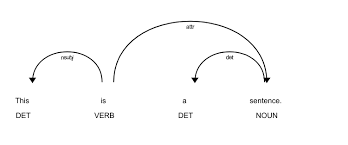


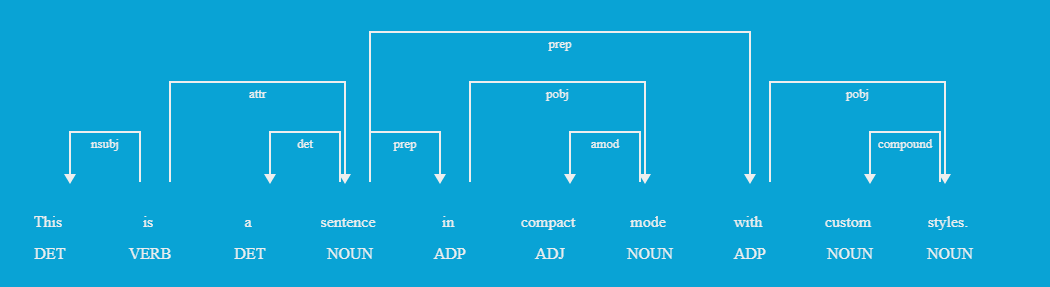

In [55]:
from spacy import displacy


In [58]:
# visualização de entidade
displacy.render(documento, style="ent", jupyter=" True")

In [60]:
# visualização de dependencia
displacy.render(documento, style="dep", jupyter=" True", options={'compact':True, 'distance': 80})

# Aula 10: Gerenciando Pipelines

- é possivel personalizar o pipeline para ter apenas as etapas que precisa
- Etapas podem ser prontas (buitl in) ou personalizadas

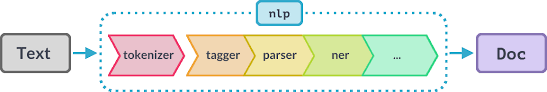

- documento = nlp("texto")
  - Cria um objeto Doc com todo o texto processado

- Modo Pipe
  - Python Generator
  - Processa sob demanda
  - Ganho de performance

- Suporta Multiprocessamento e tamanho de batch personalizados

In [62]:
print("Pipeline Normal: ", nlp.pipe_names)

Pipeline Normal:  ['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [63]:
# remover etapas

nlp.remove_pipe("tok2vec")
print("PipelineAlterado: ", nlp.pipe_names)

PipelineAlterado:  ['morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [64]:
# voltar com a etapa, mas mudando a ordem

nlp.add_pipe("tok2vec", after='morphologizer')
print("PipelineAlterado: ", nlp.pipe_names)

PipelineAlterado:  ['morphologizer', 'tok2vec', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']
